In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/qt_dataset.csv', encoding='latin-1')

# Display the first few rows of the dataframe
df.sample(10)

,ID,Oxygen,PulseRate,Temperature,Result
7462,7462,94.0,117.0,104.0,Positive
3163,3163,90.0,67.0,101.0,Positive
5295,5295,96.0,87.0,99.0,Negative
6101,6101,87.0,77.0,99.0,Positive
3288,3288,90.0,112.0,96.0,Positive
5837,5837,90.0,130.0,96.0,Positive
3127,3127,93.0,122.0,102.0,Positive
1195,1195,88.0,111.0,100.0,Positive
4478,4478,97.0,73.0,103.0,Negative
4883,4883,97.0,127.0,101.0,Negative


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [24]:
df.set_index('ID',inplace=True)

In [25]:
df.tail()

,Oxygen,PulseRate,Temperature,Result
ID,,,,
9997,99.0,56.0,105.0,Negative
9998,92.0,49.0,98.0,Positive
9999,85.0,52.0,99.0,Positive
NaN,NaN,NaN,NaN,NaN
"Covid-19 Temperature, Oxygen & Pulse Rate readings © 2021 by Rishan Mascarenhas is licensed under CC BY-NC 4.0",NaN,NaN,NaN,NaN


In [27]:
df.dropna(inplace=True)


In [31]:
df.isna().sum()

Oxygen         0
PulseRate      0
Temperature    0
Result         0
dtype: int64

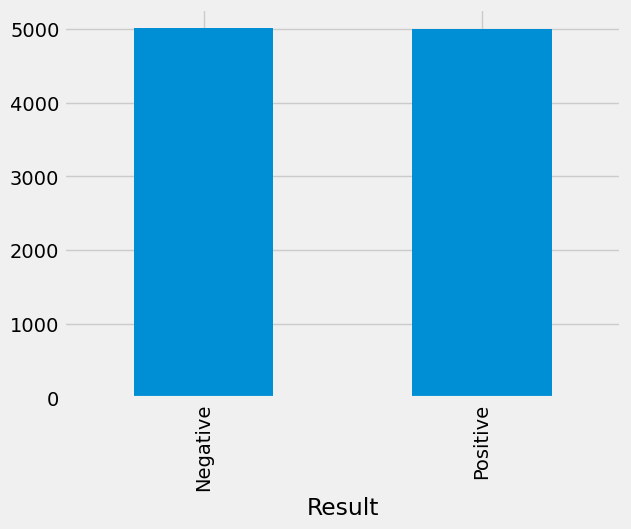

In [32]:
plt.style.use('fivethirtyeight')
df['Result'].value_counts().plot(kind='bar')
plt.show()

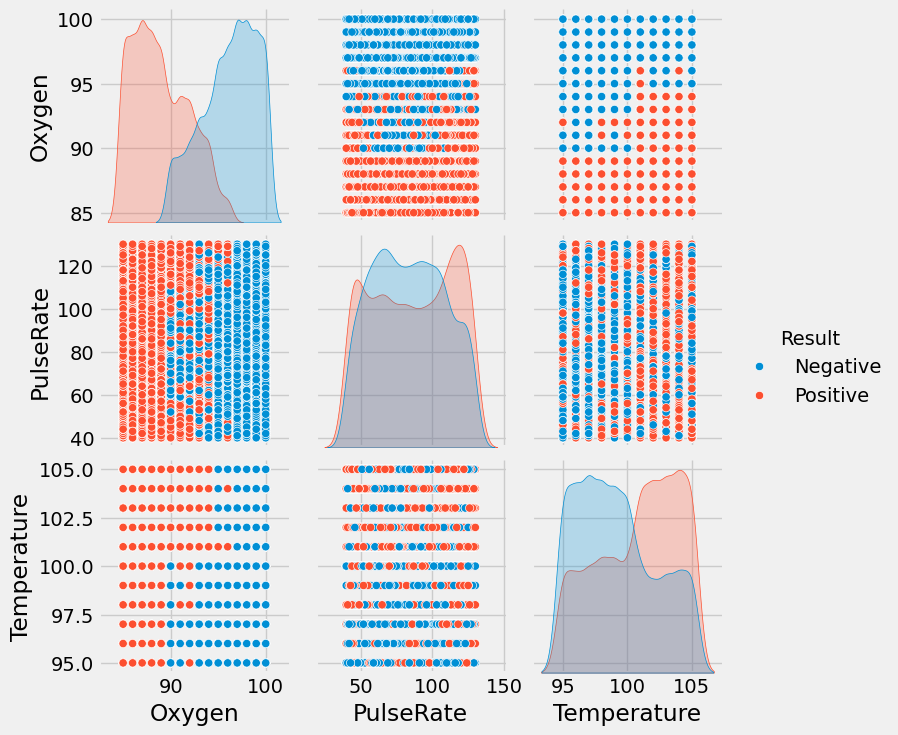

In [33]:
plt.style.use('fivethirtyeight')
sns.pairplot(data=df,hue='Result')
plt.show()

In [34]:
df['Result'].replace(['Positive','Negative'],[1,0],inplace=True)

/var/folders/wq/93316r4d6sj93zklb68sr2gw0000gn/T/ipykernel_49498/9463297.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Result'].replace(['Positive','Negative'],[1,0],inplace=True)
/var/folders/wq/93316r4d6sj93zklb68sr2gw0000gn/T/ipykernel_49498/9463297.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [35]:
df

,Oxygen,PulseRate,Temperature,Result
ID,,,,
0,98.0,65.0,95.0,0
1,96.0,92.0,95.0,0
2,95.0,92.0,99.0,0
3,97.0,56.0,96.0,0
4,88.0,94.0,98.0,1
...,...,...,...,...
9995,95.0,124.0,97.0,0
9996,88.0,70.0,100.0,1
9997,99.0,56.0,105.0,0


In [36]:
df['Result'].unique()

array([0, 1])

In [37]:
x = df.drop('Result',axis=1)
y = df['Result']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape

(8000, 3)

In [44]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the classifiers to test
classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Loop through the classifiers and perform cross-validation
for name, model in classifiers.items():
    score = cross_val_score(model, x_train_scaled, y_train, cv=5)
    print(f'{name} - Cross-validation scores: {score}')
    print(f'{name} - Mean cross-validation score: {score.mean()}')

# Choose the best model (for demonstration purposes, we choose SVM here)
best_model = SVC()
best_model.fit(x_train_scaled, y_train)

# Predict the test data
y_pred = best_model.predict(x_test_scaled)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix for the best model (SVM):\n{conf_matrix}')

SVM - Cross-validation scores: [0.968125 0.963125 0.970625 0.96375  0.9675  ]
SVM - Mean cross-validation score: 0.966625
Logistic Regression - Cross-validation scores: [0.916875 0.910625 0.930625 0.923125 0.92    ]
Logistic Regression - Mean cross-validation score: 0.92025
Random Forest - Cross-validation scores: [1. 1. 1. 1. 1.]
Random Forest - Mean cross-validation score: 1.0
K-Nearest Neighbors - Cross-validation scores: [0.991875 0.989375 0.993125 0.990625 0.98875 ]
K-Nearest Neighbors - Mean cross-validation score: 0.99075
Decision Tree - Cross-validation scores: [1. 1. 1. 1. 1.]
Decision Tree - Mean cross-validation score: 1.0
Confusion Matrix for the best model (SVM):
[[975  30]
 [ 26 969]]


# The perfect score is because of the synthetic data used in this example

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import joblib

# Load the dataset
df = pd.read_csv('../data/qt_dataset.csv', encoding='latin-1')
df.set_index('ID', inplace=True)
df.dropna(inplace=True)

# Split the data into features and target
x = df.drop('Result', axis=1)
y = df['Result']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the model
model = SVC()
model.fit(x_train_scaled, y_train)

# Save the model and scaler
joblib.dump(model, 'covid_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [53]:
import joblib
import numpy as np

# Load the model and scaler
model = joblib.load('covid_model.pkl')
scaler = joblib.load('scaler.pkl')

# Test the model with sample data
test_data = np.array([[50, 80, 90]])  # Replace with actual feature values
test_data_scaled = scaler.transform(test_data)
prediction = model.predict(test_data_scaled)
print("Prediction:", prediction)

Prediction: ['Positive']


/Users/yogeshtodarwal/opt/anaconda3/envs/covid_env/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
